In [10]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
#load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [5]:
#count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [8]:
#sample 25 mnist from train dataset
indexes = np.random.randint(0, x_train.shape[0], size = 25)
images = x_train[indexes]
labels = y_train[indexes]

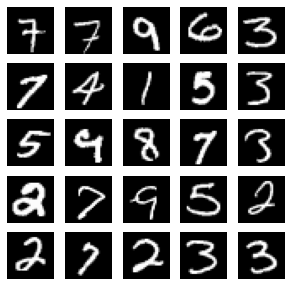

In [9]:
#plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i+1)
  image = images[i]
  plt.imshow(image, cmap = 'gray')
  plt.axis('off')
plt.show()

In [11]:
#compute the number of labels
num_labels = len(np.unique(y_train))

In [12]:
#convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
#image dimensions
image_size = x_train.shape[1]
input_size = image_size*image_size
print(input_size)
print(x_train.shape)

784
(60000, 28, 28)


In [20]:
#resize and normalize
x_train = x_train.reshape(-1, input_size)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(-1, input_size)
x_test = x_test.astype('float32')/255

In [31]:
#network parameters
batch_size = 128
hidden_units = 256
dropout = 0.3

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

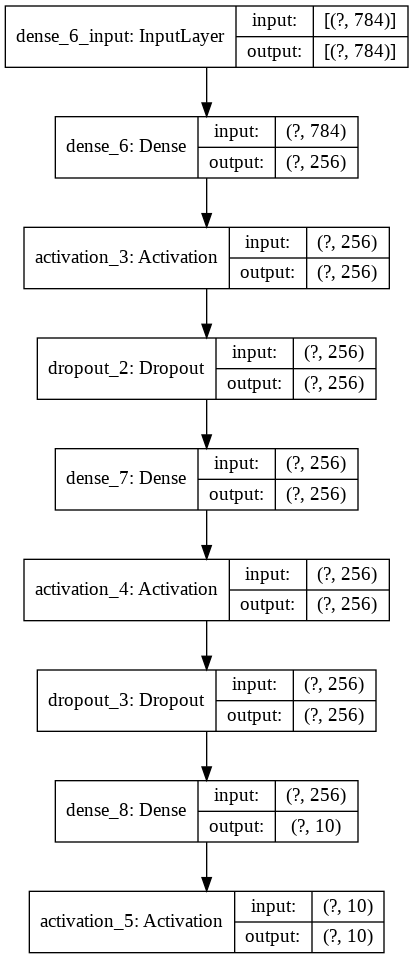

In [32]:
#model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
#this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, show_shapes=True)

In [33]:
#loss function for one-hot vector
#use of adam optimizer
#accuracy is good metric for classification tasks
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [34]:
#train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3484 - accuracy: 0.8954
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1465 - accuracy: 0.9556
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1098 - accuracy: 0.9661
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.9715
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0780 - accuracy: 0.9758
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9781
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0584 - accuracy: 0.9807
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0550 - accuracy: 0.9826
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0519 - accuracy: 0.9828
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0449 - accuracy: 0.9850

In [35]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose = 1)
print("Test accuracy: %.2f%%" %(100.0*acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9834
Test accuracy: 98.34%
